## Scraping Review Google Play - MyTelkomsel | MyIM3 | MyXL 
  'com.telkomsel.telkomselcm',
    'com.pure.indosat.care',
     'com.apps.MyXL',


In [13]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [14]:
 app_packages = [
  'com.telkomsel.telkomselcm', 
     'com.pure.indosat.care', 
     'com.apps.MyXL'
]

In [15]:
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='US')
  del info['comments']
  app_infos.append(info)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.35it/s]


In [16]:
def print_json(json_object):
  json_str = json.dumps(
    json_object,
    indent=2,
    sort_keys=True,
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [17]:
print_json(app_infos[0])

{
  "adSupported": true,
  "androidVersion": "7.0",
  "androidVersionText": "7.0 and up",
  "appId": "com.telkomsel.telkomselcm",
  "containsAds": true,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "THE KEY TO THE WORLD OF MORE\r\n\r\nWith the new face of Telkomsel, we invite you to open up a world of opportunities\u2014with MyTelkomsel as the key. Through the rejuvenated app, MyTelkomsel offers you various telco products and digital services to unlock the portal to limitless information, communication and digital activities. So, get the latest version of MyTelkomsel now to enter the world of more, for all. \r\n\r\nThe chance to get many rewards is still open for you through Daily Check In. Check in automatically and collect the stamps every day to get up to 7.5GB data quota and other rewards. \r\n\r\nBuying credit and packages on MyTelkomsel is easier by using various payment methods such as LinkAja, GoPay, ShopeePay, OVO, DA

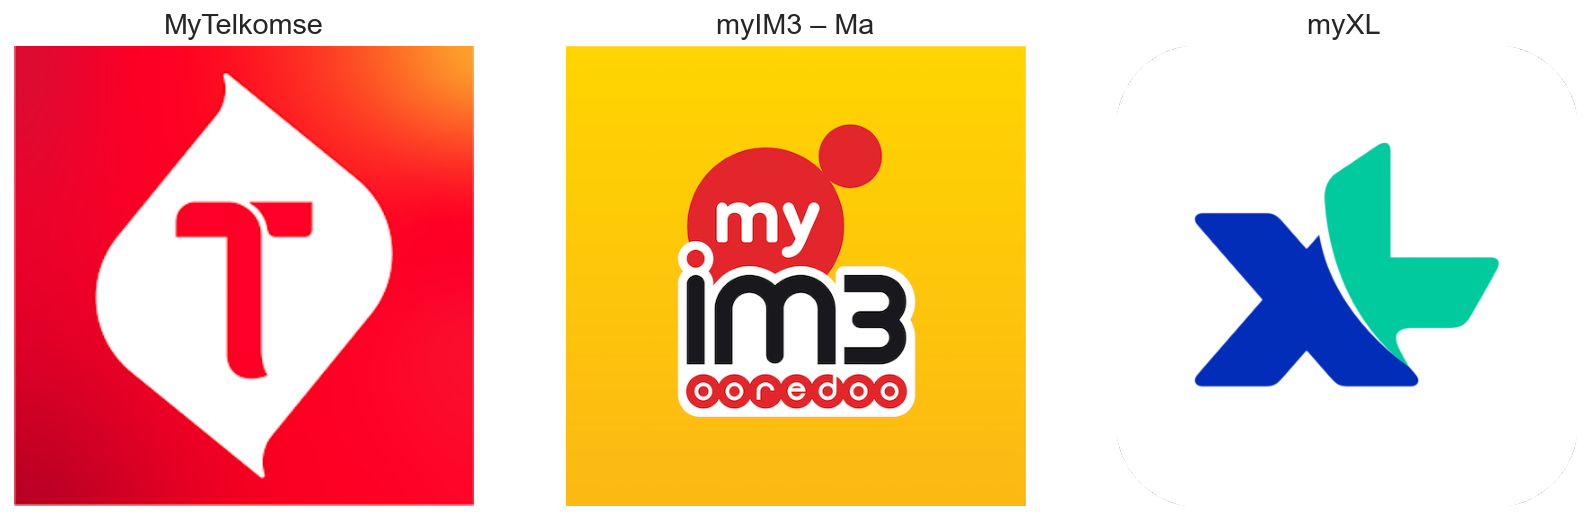

In [18]:
def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:10]

fig, axs = plt.subplots(1, len(app_infos) // 1, figsize=(14, 5))

for i, ax in enumerate(axs.flat):
  ai = app_infos[i]
  img = plt.imread(ai['icon'])
  ax.imshow(img)
  ax.set_title(format_title(ai['title']))
  ax.axis('off')

In [19]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.to_csv('apps.csv', index=None, header=True)

In [22]:
app_reviews = []

for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='en',
        country='us',
        sort=sort_order,
       count= 1700 if score == 3 else 1600,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [04:14<00:00, 84.92s/it]


In [23]:
print_json(app_reviews[0])

{
  "appId": "com.telkomsel.telkomselcm",
  "at": "2021-10-05 00:39:58",
  "content": "The app was good back then to buy packages, but now it's very bloated. The recent redesign of the app has made everything much slower, and with the latest update i can't even login. The app had a lot of useless stuff back then but atleast it was working. Simplicity is much better when talking about managing apps like this. Making sure it's working properly is number 1, everything else is not as important. Take a note of BCA's app.",
  "repliedAt": "2021-10-05 13:16:04",
  "replyContent": "Hi, Mr. Latif. We are sorry if something makes you uncomfortable. For helping you more optimally, please contact us through the help feature in the MyTelkomsel application, DM Twitter @telkomsel, or email to cs@telkomsel.co.id. Thank you :) -Kanaya",
  "reviewCreatedVersion": "6.3.0",
  "reviewId": "gp:AOqpTOGg3PfNWrw-wyIbWVGSqy_ezrB1CXHjSf6tVxQvT-YjByqxq54IDR7RaI5CVmCiUGw94EeZnxYqvRjzD6I",
  "score": 1,
  "sortOrde

In [24]:
len(app_reviews)

47000

In [25]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('reviews10.csv', index=None, header=True)

In [26]:
df = pd.DataFrame(app_reviews)
  
# displaying the DataFrame
display(df)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOGg3PfNWrw-wyIbWVGSqy_ezrB1CXHjSf6tVxQ...,Latif Busyeiri,https://play-lh.googleusercontent.com/a-/AOh14...,"The app was good back then to buy packages, bu...",1,18,6.3.0,2021-10-05 00:39:58,"Hi, Mr. Latif. We are sorry if something makes...",2021-10-05 13:16:04,newest,com.telkomsel.telkomselcm
1,gp:AOqpTOH57jFb1dGfCiYbwURnVAbhAuoeAFS8F6fb2L7...,Frederiko 062,https://play-lh.googleusercontent.com/a-/AOh14...,"for a mere pocket app, this app cost a lot amo...",1,14,6.3.0,2021-10-04 23:56:43,None,NaT,newest,com.telkomsel.telkomselcm
2,gp:AOqpTOGa4ple0LFCRrSPntdzhCKi9DbJqin6a8FHnkA...,andreas spin,https://play-lh.googleusercontent.com/a-/AOh14...,Useless after the latest update. Can't even pa...,1,50,6.3.0,2021-10-02 14:06:33,None,NaT,newest,com.telkomsel.telkomselcm
3,gp:AOqpTOE1YRJOjyflocfAsuXVH5uHq4XrNf8T_AVhsbm...,sen san,https://play-lh.googleusercontent.com/a-/AOh14...,"Horrible experience, instead of simplicity the...",1,92,6.2.0,2021-09-10 09:59:58,None,NaT,newest,com.telkomsel.telkomselcm
4,gp:AOqpTOHQGf_wyC99QkEmWRyB2QnUUkwh9fGNe2rjkag...,Nicky Sabella,https://play-lh.googleusercontent.com/a-/AOh14...,A silly app that always crashes and asks for r...,1,157,6.3.0,2021-09-11 14:59:51,None,NaT,newest,com.telkomsel.telkomselcm
...,...,...,...,...,...,...,...,...,...,...,...,...
46995,gp:AOqpTOHba-1pDcAwHD4WJ6UPzhB5yMLohvl_9JxWM1N...,Hendra,https://play-lh.googleusercontent.com/a-/AOh14...,"Kenapa bisa masuk game booster di samsung yah,...",5,0,5.3.1,2021-04-27 20:27:25,None,NaT,newest,com.apps.MyXL
46996,gp:AOqpTOGkjUtEoaTeFgAglUH7nixkAOklSLTLJQzH493...,Hendra,https://play-lh.googleusercontent.com/a/AATXAJ...,Ok,5,0,5.2.1,2021-04-27 09:14:36,None,NaT,newest,com.apps.MyXL
46997,gp:AOqpTOEkbLfjJzErbqq1R0EbKSuquix5A-vi9SMzFtZ...,Warmi Mamik,https://play-lh.googleusercontent.com/a-/AOh14...,Bagus,5,0,5.3.1,2021-04-27 06:10:06,None,NaT,newest,com.apps.MyXL
46998,gp:AOqpTOH2mmM8I12FOfkOrJCv6RdF9jeG1HaOUrE69A-...,Tangkas Kusuma,https://play-lh.googleusercontent.com/a-/AOh14...,TOLONG LOADING APLIKASINYA DI PERCEPAT YA BUKA...,5,0,5.3.1,2021-04-26 08:49:10,"Hi, mohon maaf atas kendala yang dihadapi, unt...",2020-03-08 09:27:06,newest,com.apps.MyXL
